In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Mushroom.csv', header = None)
# shuffling the dataset
index = [i for i in range(dataset.shape[0])]
np.random.shuffle(index)
dataset = dataset.set_index([index]).sort_index()
# splitting the first 6000 as training set 
train_data = dataset.iloc[:6000]
# getting the training labels
train_labels = train_data[0]
# getting the trainging values
train_values = train_data.iloc[:,1:]
# spltting the rest of the dataset as test set
test_data = dataset.iloc[6000:]
# getting test lalbels
test_labels = test_data[0]
# getting test values
test_values = test_data.iloc[:,1:]

In [3]:
def bagging(predictions, num_size):
    # final prediction list
    pred_list = []
    # for each item
    for i in range(num_size):
        # prediction list for each item
        pred = []
        # in each prediction
        for j in range(len(predictions)):
            pred.append(predictions[j][i])
        # get the mode of all all the predictions
        pred_list.append(max(set(pred), key=pred.count))
    return pred_list

In [4]:
def random_forest(train, label, test, num_features, num_trees, sample_size):
    # test predictions list
    predictions = []
    # train predictions list
    train_predictions = []
    # creating num_trees decision trees with different sampling
    for i in range(num_trees):
        # shuffling the train and test dataset
        for j in [0,1]:
            index = [i for i in range(train.shape[j])]
            np.random.shuffle(index)
            # for row indices
            if j == 0:
                train = train.set_index([index]).sort_index(axis=j)
                label = label.set_index([index]).sort_index(axis=j)
            # for feature indices
            else:
                train = train.iloc[:, index]
                test = test.iloc[:, index]
        # sub sampling 
        sample = train.iloc[:sample_size,:num_features]
        # building decision tree
        decision_tree = DecisionTreeClassifier(random_state=2, max_depth=2, splitter='random').fit(sample.to_numpy(), (label.iloc[:sample_size]).to_numpy())
        # appending the test predictions
        predictions.append(decision_tree.predict((test.iloc[:,:num_features]).to_numpy()))
        # appending the train predictions
        train_predictions.append(decision_tree.predict((train.iloc[:,:num_features]).to_numpy()))
    # getting the final test predctions
    predict = bagging(predictions, test.shape[0])
    # getting the final train predctions
    train_predict = bagging(train_predictions, train.shape[0])
    return predict,train_predict

In [5]:
def accuracy_metric(real, predicted):
    correct = 0
    # for each item
    for i in range(len(real)):
        # if equal
        if real[i] == predicted[i]:
            # increment score
            correct += 1
    return correct / float(len(real)) * 100.0

In [6]:
accuracy_features_list = []
train_accuracy_features_list = []
features_list = [5,10,15,20]
# for different number of features in each sample
for num_features in features_list:
    # Get the test and train predictions
    predictions, train_preditcions = random_forest(train_values, train_labels.to_frame(), test_values, num_features, 100, 6000)
    # add to accuracy test list
    accuracy_features_list.append(accuracy_metric(test_labels.to_numpy(), predictions))
    # add to accuracy train list
    train_accuracy_features_list.append(accuracy_metric(train_labels.to_numpy(), train_preditcions))
    

In [7]:
accuracy_num_trees_list = []
train_accuracy_num_trees_list = []
num_trees_list = [10,20,40,80,100]
# for different number of decision trees
for num_trees in num_trees_list:
    # Get the test and train predictions
    predictions, train_preditcions = random_forest(train_values, train_labels.to_frame(), test_values, 20, num_trees, 6000)
    # add to accuracy test list
    accuracy_num_trees_list.append(accuracy_metric(test_labels.to_numpy(), predictions))
    # add to accuracy train list
    train_accuracy_num_trees_list.append(accuracy_metric(train_labels.to_numpy(), train_preditcions))

In [8]:
print(accuracy_features_list)
print(accuracy_num_trees_list)
print(train_accuracy_features_list)
print(train_accuracy_num_trees_list)

[89.21845574387947, 92.79661016949152, 91.94915254237289, 94.6798493408663]
[91.66666666666666, 94.0677966101695, 92.41996233521658, 91.33709981167608, 94.0677966101695]
[51.1, 50.8, 50.11666666666667, 51.05]
[49.516666666666666, 49.65, 51.03333333333333, 50.083333333333336, 49.983333333333334]


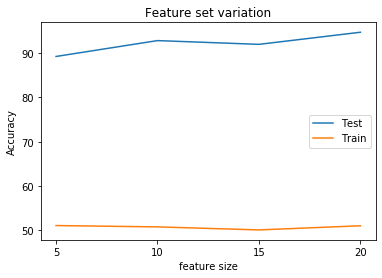

In [9]:
plt.clf()
plt.plot(accuracy_features_list,label="Test")
plt.plot(train_accuracy_features_list,label="Train")
plt.title("Feature set variation")
plt.xlabel("feature size")
plt.ylabel("Accuracy")
plt.xticks(list(range(len(features_list))), features_list)
plt.legend()
plt.savefig(fname='Feature_accuracy.png',format='png')

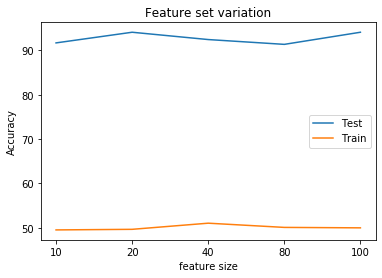

In [10]:
plt.clf()
plt.plot(accuracy_num_trees_list,label="Test")
plt.plot(train_accuracy_num_trees_list,label="Train")
plt.title("Feature set variation")
plt.xlabel("feature size")
plt.ylabel("Accuracy")
plt.xticks(list(range(len(num_trees_list))), num_trees_list)
plt.legend()
plt.savefig(fname='Num_trees_accuracy.png',format='png')